In [6]:
x <- seq(5,50)
e <- x*rnorm(length(x), 0, 1)
y <- 10+2*x+e

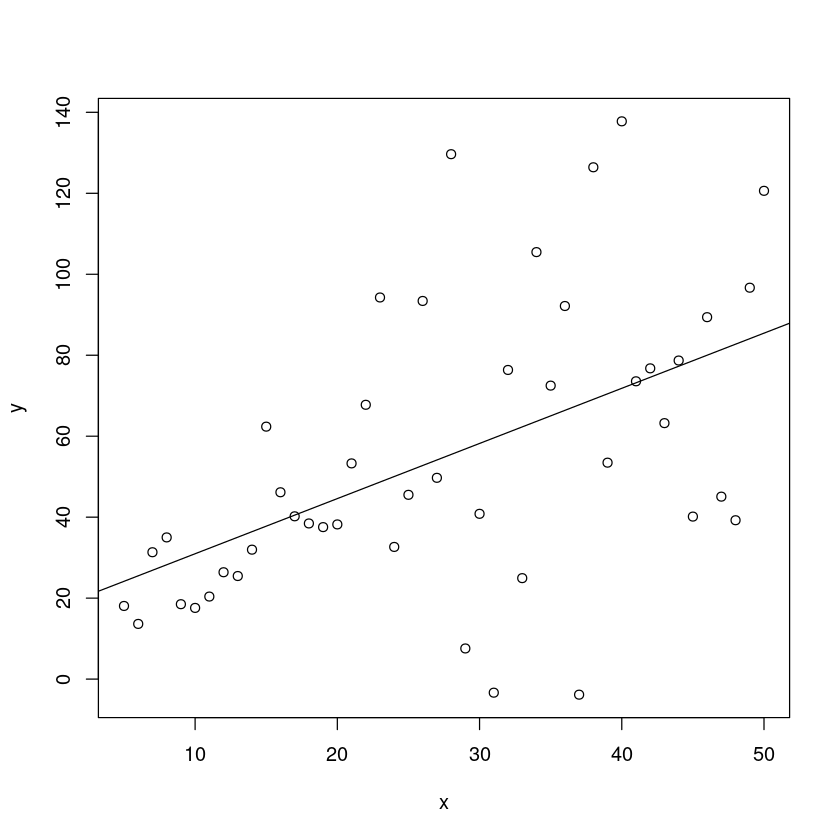

In [7]:
plot(x,y)
abline(lm(y~x))

Warning message in log(y):
“NaNs produced”
Warning message in log(y):
“NaNs produced”


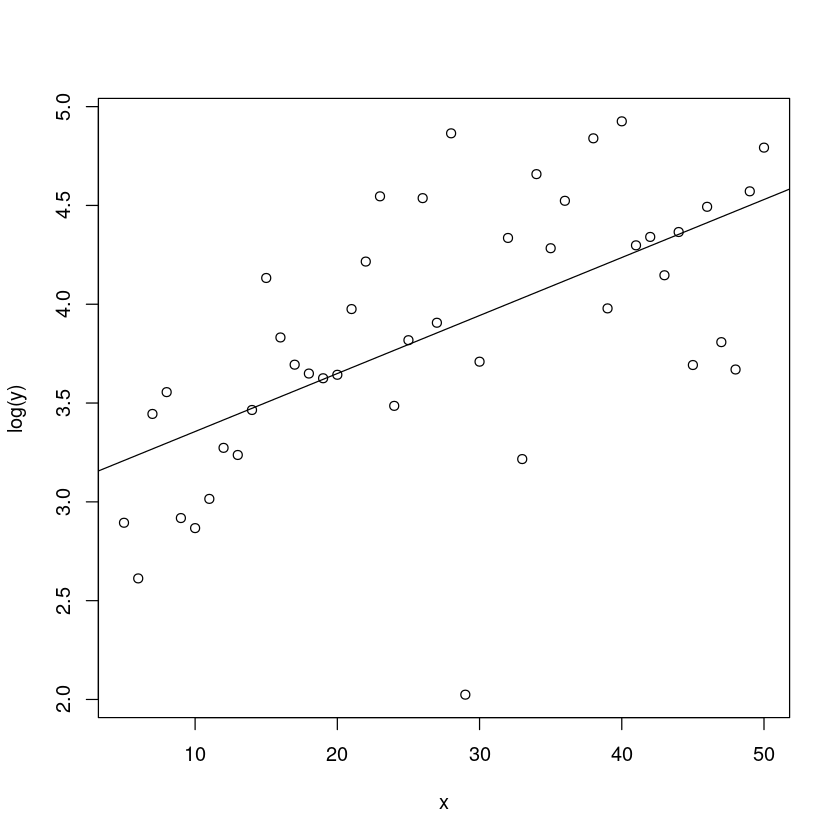

In [9]:
plot(x,log(y))
abline(lm(log(y)~x))

In [10]:
m1 <- lm(y~x)
summary(m1)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.593 -12.507  -3.915  11.785  74.169 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.3500    10.4571   1.659 0.104196    
x             1.3622     0.3424   3.978 0.000256 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.83 on 44 degrees of freedom
Multiple R-squared:  0.2645,	Adjusted R-squared:  0.2478 
F-statistic: 15.82 on 1 and 44 DF,  p-value: 0.000256


In [11]:
m2 <- lm(y~x, weights=1/x)
summary(m2)


Call:
lm(formula = y ~ x, weights = 1/x)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-12.001  -2.963  -0.564   2.776  14.003 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.2748     6.3944   2.076   0.0438 *  
x             1.5104     0.2794   5.405 2.51e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.512 on 44 degrees of freedom
Multiple R-squared:  0.399,	Adjusted R-squared:  0.3854 
F-statistic: 29.21 on 1 and 44 DF,  p-value: 2.506e-06


In [12]:
library('sandwich')

In [13]:
m1 <- lm(y~x)
s1 <- summary(lm(y~x))

In [14]:
s1


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.593 -12.507  -3.915  11.785  74.169 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.3500    10.4571   1.659 0.104196    
x             1.3622     0.3424   3.978 0.000256 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.83 on 44 degrees of freedom
Multiple R-squared:  0.2645,	Adjusted R-squared:  0.2478 
F-statistic: 15.82 on 1 and 44 DF,  p-value: 0.000256


In [15]:
s1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),17.350019,10.4571073,1.659160,0.104195898
x,1.362168,0.3424421,3.977805,0.000255956


In [17]:
sqrt(vcovHC(m1, type='HC0'))

Warning message in sqrt(vcovHC(m1, type = "HC0")):
“NaNs produced”


,(Intercept),x
(Intercept),5.824242,NaN
x,NaN,0.2686305


In [21]:
vcovHC(m1, type='HC1')
vcovHC(m1, type='HC2')
vcovHC(m1, type='HC3')
vcovHC(m1, type='HC4')

,(Intercept),x
(Intercept),35.463693,-1.30634218
x,-1.306342,0.07544246


,(Intercept),x
(Intercept),35.838881,-1.33128201
x,-1.331282,0.07654928


,(Intercept),x
(Intercept),37.885150,-1.41887341
x,-1.418873,0.08123713


,(Intercept),x
(Intercept),36.756086,-1.3779177
x,-1.377918,0.0787639


In [22]:
library('lmtest')

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [23]:
coeftest(m1)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.35002   10.45711  1.6592 0.104196    
x            1.36217    0.34244  3.9778 0.000256 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [27]:
coeftest(m1, vcov. = vcovHC(m1, type='HC3'))


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 17.35002    6.15509  2.8188  0.007197 ** 
x            1.36217    0.28502  4.7792 1.992e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
sqrt(vcovHC(m1, type='HC0')) # white
sqrt(vcovHC(m1, type='HC1'))
sqrt(vcovHC(m1, type='HC2'))
sqrt(vcovHC(m1, type='HC3'))
sqrt(vcovHC(m1, type='HC4'))

Warning message in sqrt(vcovHC(m1, type = "HC0")):
“NaNs produced”


,(Intercept),x
(Intercept),5.824242,NaN
x,NaN,0.2686305


Warning message in sqrt(vcovHC(m1, type = "HC1")):
“NaNs produced”


,(Intercept),x
(Intercept),5.95514,NaN
x,NaN,0.2746679


Warning message in sqrt(vcovHC(m1, type = "HC2")):
“NaNs produced”


,(Intercept),x
(Intercept),5.986558,NaN
x,NaN,0.2766754


Warning message in sqrt(vcovHC(m1, type = "HC3")):
“NaNs produced”


,(Intercept),x
(Intercept),6.155091,NaN
x,NaN,0.2850213


Warning message in sqrt(vcovHC(m1, type = "HC4")):
“NaNs produced”


,(Intercept),x
(Intercept),6.06268,NaN
x,NaN,0.2806491


In [29]:
s1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),17.350019,10.4571073,1.659160,0.104195898
x,1.362168,0.3424421,3.977805,0.000255956


In [30]:
x <- seq(5,100)

bh1 <- bh2 <- se1 <- se2 <- se3 <- c() 

for (i in 1:1000){
    e <- x*rnorm(length(x), 0, 1)
    y <- 10+2*x+e

    m1 <- summary(lm(y~x))
    m2 <- summary(lm(y~x, weights=1/x))
    
    bh1 <- c(bh1, m1$coefficients[2,1]) 
    bh2 <- c(bh2, m2$coefficients[2,1]) 
    se1 <- c(se1, m1$coefficients[2,2]) 
    se2 <- c(se2, m2$coefficients[2,2]) 
    se3 <- c(se3, sqrt(vcovHC(lm(y~x), type='HC0')[2,2]))
    
}



In [31]:
mean(bh1)
mean(bh2)

[1] 1.995202

[1] 1.997142

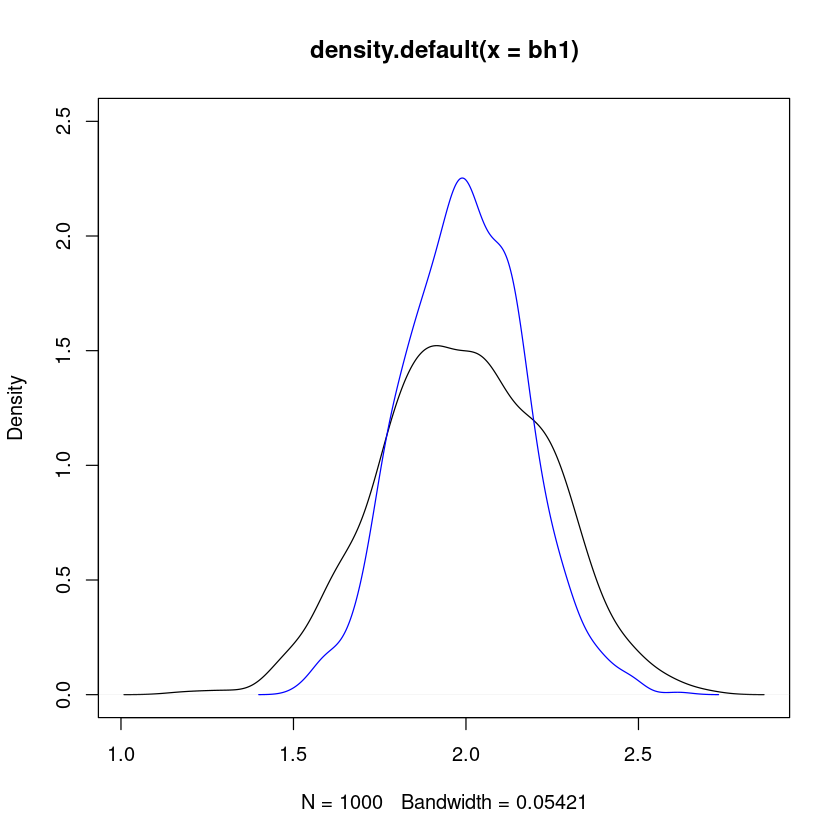

In [32]:
plot(density(bh1), ylim=c(0,2.5))
lines(density(bh2), col='blue')

In [33]:
sd(bh1)

[1] 0.2397933

In [34]:
sd(bh2)

[1] 0.1720139

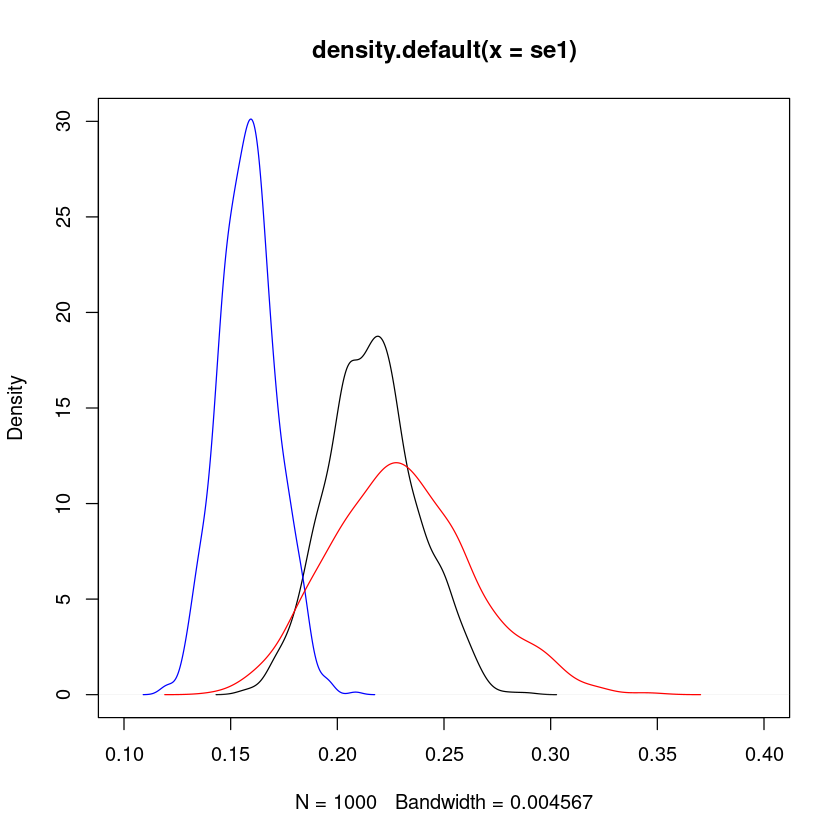

In [35]:
plot(density(se1), xlim=c(0.1,0.4), ylim=c(0,30))
lines(density(se2), col='blue')
lines(density(se3), col='red')